#**Load Library**

In [ ]:
from sklearn import preprocessing
import io
import numpy as np# linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#**Preprocessing**

## Data Preparation

### Load Data

In [ ]:
df = pd.read_csv("covid-19 tweet vaksin.csv", encoding= 'unicode_escape')
df

,id,label,tweet_text
0,1,1,"4,000 a day dying from the so called Covid-19 ..."
1,2,2,Pranam message for today manifested in Dhyan b...
2,3,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,4,1,"Confirmation that Chinese #vaccines ""donEEt h..."
4,5,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."
...,...,...,...
5995,5996,2,@Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996,5997,3,So happy to be fully vaccinated against COVID-...
5997,5998,2,Serum Institute of India announces cost of Cov...
5998,5999,1,@___batshitcrazy @BarrowfordHead @Bectully I h...


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6000 non-null   int64 
 1   label       6000 non-null   int64 
 2   tweet_text  6000 non-null   object
dtypes: int64(2), object(1)
memory usage: 140.8+ KB


### Visualization of dispersal of label data

> This step is used to known the number of data every label (1: Negative, 2:Netral, 3:Positive)



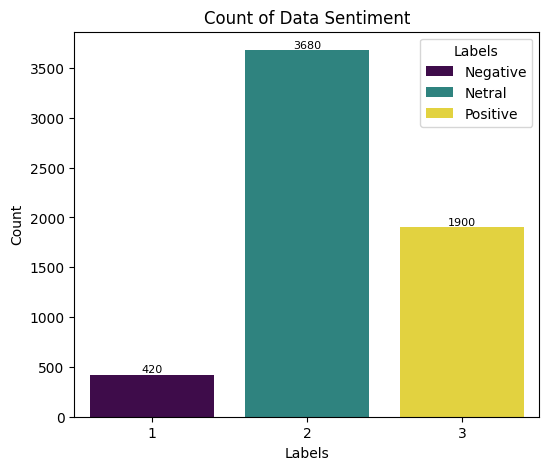

In [ ]:
#Calculate total every label 1;2;3


import seaborn as sns
import matplotlib.pyplot as plt

#GRAPHIC

# Plotting
plt.figure(figsize=(6, 5))

# Get the counts of each label
counts_series = df['label'].value_counts()
counts_dict = counts_series.to_dict()

# Plot the count plot
plot = sns.countplot(x='label', hue='label', data=df, palette='viridis', dodge=False)
# Add text annotations
for label, count in counts_dict.items():
    plt.text(label - 1, count + 0.1, str(count), ha='center', va='bottom', fontsize=8)

# Add title and labels to the plot
plt.title('Count of Data Sentiment')
plt.xlabel('Labels')
plt.ylabel('Count')

# Set custom tick labels for x-axis
plt.xticks(ticks=[0, 1,2],labels=['1', '2', '3'])

# Add legend
handles, labels = plot.get_legend_handles_labels()

labels = ['Negative', 'Netral', 'Positive']
plt.legend(handles, labels, title='Labels')
# Display the plot
plt.show()

from the graph it is found that the dataset is imbalanced, where the negative sentiment is only 420 while the positive sentiment is 1900. therefore I do the undersampling method by deleting in order the positive data becomes the same as the negative data becomes the same 420.

I intentionally make the number of positive and negative data have the same amount of data (drop method) so that the precision score does not have a significant difference between positive and negative data from imbalance data.

### Drop Unused data

```
# In this research is only used 2 label (Negative and Positive), so this step is to drop Netral label
```



In [ ]:
df.head()

,id,label,tweet_text
0,1,1,"4,000 a day dying from the so called Covid-19 ..."
1,2,2,Pranam message for today manifested in Dhyan b...
2,3,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,4,1,"Confirmation that Chinese #vaccines ""donEEt h..."
4,5,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [ ]:
# Filter rows where label is 1 or 3
num_label_1 = df[df['label'] == 1].shape[0]
label_1_data = df[df['label'].isin([1])]
label_3_data = df[df['label'] == 3].sample(n=num_label_1, random_state=0)

new_df  =pd.concat([label_3_data, label_1_data], axis=0)
# Switch the order of column and shuffle
new_df = new_df[['tweet_text', 'label']].sample(frac=1)
new_df

,tweet_text,label
4103,Pro Govt propaganda will kill. #Covaxin is not...,1
4132,Vaccine gives us new hope. ?? I got my 2ND DOS...,3
3356,"@drharshvardhan Sir, since the cases are reach...",3
1369,@CP24 Moscow Russia everything is open busines...,3
171,The #COVID19 vaccine developed by China's #Sin...,3
...,...,...
4134,More negative news on the Covid Vaccine #Oxfor...,1
4764,Norway &amp; other EU aligned\ncountries suspe...,1
5590,"@Enrico71767783 yes, they gave #slovakia gover...",1
2450,Anyone still trust the CCP and believe them? ...,1


In [ ]:
# Reset the index
new_df.reset_index(drop=True, inplace=True)
new_df

,tweet_text,label
0,Pro Govt propaganda will kill. #Covaxin is not...,1
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,3
2,"@drharshvardhan Sir, since the cases are reach...",3
3,@CP24 Moscow Russia everything is open busines...,3
4,The #COVID19 vaccine developed by China's #Sin...,3
...,...,...
835,More negative news on the Covid Vaccine #Oxfor...,1
836,Norway &amp; other EU aligned\ncountries suspe...,1
837,"@Enrico71767783 yes, they gave #slovakia gover...",1
838,Anyone still trust the CCP and believe them? ...,1


### Check Duplicate Data

In [ ]:
# Check for duplicate values in 'tweet_text' column
duplicate_tweets = new_df[new_df.duplicated(subset=['tweet_text'], keep=False)]
duplicate_tweets

,tweet_text,label


### Encoding Label

```
# Change value of label negatif 1 to 0 and label positif 3 to 1
```



In [ ]:
# Replace values in 'label' column
new_df['label'] = new_df['label'].replace({1: 0, 3: 1})
new_df

,tweet_text,label
0,Pro Govt propaganda will kill. #Covaxin is not...,0
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,1
2,"@drharshvardhan Sir, since the cases are reach...",1
3,@CP24 Moscow Russia everything is open busines...,1
4,The #COVID19 vaccine developed by China's #Sin...,1
...,...,...
835,More negative news on the Covid Vaccine #Oxfor...,0
836,Norway &amp; other EU aligned\ncountries suspe...,0
837,"@Enrico71767783 yes, they gave #slovakia gover...",0
838,Anyone still trust the CCP and believe them? ...,0


### Visualization the data after encode

In [ ]:
new_df.head()

,tweet_text,label
0,Pro Govt propaganda will kill. #Covaxin is not...,0
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,1
2,"@drharshvardhan Sir, since the cases are reach...",1
3,@CP24 Moscow Russia everything is open busines...,1
4,The #COVID19 vaccine developed by China's #Sin...,1


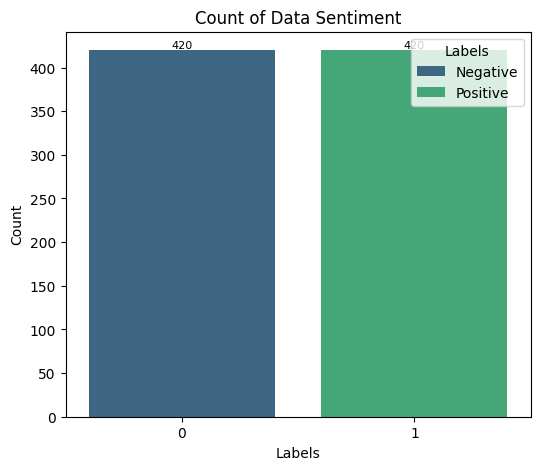

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#GRAPHIC

# Plotting
plt.figure(figsize=(6, 5))

# Get the counts of each label
counts_series = new_df['label'].value_counts()
counts_dict = counts_series.to_dict()

# Plot the count plot
plot = sns.countplot(x='label', hue='label', data=new_df, palette='viridis', dodge=False)
# Add text annotations
for label, count in counts_dict.items():
    plt.text(label, count, str(count), ha='center', va='bottom', fontsize=8)

# Add title and labels to the plot
plt.title('Count of Data Sentiment')
plt.xlabel('Labels')
plt.ylabel('Count')

# Set custom tick labels for x-axis
plt.xticks(ticks=[0, 1],labels=['0', '1'])

# Add legend
handles, labels = plot.get_legend_handles_labels()

labels = ['Negative','Positive']
plt.legend(handles, labels, title='Labels')
# Display the plot
plt.show()

# Text Preprocessing

### Text Cleansing

In [ ]:
#Test Cleaning
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Function to remove Url
def remove_urls(text):
    # Define the pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Remove URLs from the text using the pattern
    return url_pattern.sub(r'', text)

# Function to remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Function to remove mentions (@)
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9_]+', '', text)

# Function to remove hashtags (#), optional
def remove_hashtags(text):
    return re.sub(r'#([^\s]+)', '', text)

# Function to remove special characters and numbers, keep only alphabetical characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

### Apply Function
to compare cleaned and un-cleaned data.

In [ ]:
# Apply all cleaning functions to 'tweet_text' column
# cleaned tweet yang sudah bersih dari simbol"
new_df['cleaned_tweet'] = new_df['tweet_text'].apply(remove_urls)
new_df['cleaned_tweet'] = new_df['cleaned_tweet'].apply(remove_html_tags)
new_df['cleaned_tweet'] = new_df['cleaned_tweet'].apply(remove_mentions)
new_df['cleaned_tweet'] = new_df['cleaned_tweet'].apply(remove_hashtags)
new_df['cleaned_tweet'] = new_df['cleaned_tweet'].apply(remove_special_characters)
new_df['cleaned_tweet'] = new_df['cleaned_tweet'].apply(convert_to_lowercase)
new_df

,tweet_text,label,cleaned_tweet
0,Pro Govt propaganda will kill. #Covaxin is not...,0,pro govt propaganda will kill is not yet appr...
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,1,vaccine gives us new hope i got my nd dose to...
2,"@drharshvardhan Sir, since the cases are reach...",1,sir since the cases are reaching l per day ag...
3,@CP24 Moscow Russia everything is open busines...,1,moscow russia everything is open business as ...
4,The #COVID19 vaccine developed by China's #Sin...,1,the vaccine developed by chinas has been app...
...,...,...,...
835,More negative news on the Covid Vaccine #Oxfor...,0,more negative news on the covid vaccine
836,Norway &amp; other EU aligned\ncountries suspe...,0,norway amp other eu aligned\ncountries suspend...
837,"@Enrico71767783 yes, they gave #slovakia gover...",0,yes they gave government a condition to appr...
838,Anyone still trust the CCP and believe them? ...,0,anyone still trust the ccp and believe them i...


### Tokenization




In [ ]:
# Tokenize the 'cleaned_tweet' column using NLTK's word_tokenize
new_df['tokens'] = new_df['cleaned_tweet'].apply(word_tokenize)
new_df

,tweet_text,label,cleaned_tweet,tokens
0,Pro Govt propaganda will kill. #Covaxin is not...,0,pro govt propaganda will kill is not yet appr...,"[pro, govt, propaganda, will, kill, is, not, y..."
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,1,vaccine gives us new hope i got my nd dose to...,"[vaccine, gives, us, new, hope, i, got, my, nd..."
2,"@drharshvardhan Sir, since the cases are reach...",1,sir since the cases are reaching l per day ag...,"[sir, since, the, cases, are, reaching, l, per..."
3,@CP24 Moscow Russia everything is open busines...,1,moscow russia everything is open business as ...,"[moscow, russia, everything, is, open, busines..."
4,The #COVID19 vaccine developed by China's #Sin...,1,the vaccine developed by chinas has been app...,"[the, vaccine, developed, by, chinas, has, bee..."
...,...,...,...,...
835,More negative news on the Covid Vaccine #Oxfor...,0,more negative news on the covid vaccine,"[more, negative, news, on, the, covid, vaccine]"
836,Norway &amp; other EU aligned\ncountries suspe...,0,norway amp other eu aligned\ncountries suspend...,"[norway, amp, other, eu, aligned, countries, s..."
837,"@Enrico71767783 yes, they gave #slovakia gover...",0,yes they gave government a condition to appr...,"[yes, they, gave, government, a, condition, to..."
838,Anyone still trust the CCP and believe them? ...,0,anyone still trust the ccp and believe them i...,"[anyone, still, trust, the, ccp, and, believe,..."


### Remove Stop words

In [ ]:
# Function to remove stop words using NLTK's stopwords list
stop_words = set(stopwords.words('english'))  # Set of English stop words
def remove_stop_words(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
new_df['stopwords_tokens'] = new_df['tokens'].apply(remove_stop_words)

In [ ]:
# new_df = new_df.drop('tokens_with_stopwords', axis=1)

In [ ]:
new_df.head()

,tweet_text,label,cleaned_tweet,tokens,stopwords_tokens
0,Pro Govt propaganda will kill. #Covaxin is not...,0,pro govt propaganda will kill is not yet appr...,"[pro, govt, propaganda, will, kill, is, not, y...","[pro, govt, propaganda, kill, yet, approved, a..."
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,1,vaccine gives us new hope i got my nd dose to...,"[vaccine, gives, us, new, hope, i, got, my, nd...","[vaccine, gives, us, new, hope, got, nd, dose,..."
2,"@drharshvardhan Sir, since the cases are reach...",1,sir since the cases are reaching l per day ag...,"[sir, since, the, cases, are, reaching, l, per...","[sir, since, cases, reaching, l, per, day, don..."
3,@CP24 Moscow Russia everything is open busines...,1,moscow russia everything is open business as ...,"[moscow, russia, everything, is, open, busines...","[moscow, russia, everything, open, business, u..."
4,The #COVID19 vaccine developed by China's #Sin...,1,the vaccine developed by chinas has been app...,"[the, vaccine, developed, by, chinas, has, bee...","[vaccine, developed, chinas, approved, emergen..."


### Stemming and Lemmatization

In [ ]:
# Initialize stemming and lemmatization objects
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function for stemming
def apply_stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

# Function for lemmatization
def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply stemming, and lemmatization
new_df['stemmed_tokens'] = new_df['stopwords_tokens'].apply(apply_stemming)
new_df['lemmatized_tokens'] = new_df['stopwords_tokens'].apply(apply_lemmatization)

In [ ]:
new_df

,tweet_text,label,cleaned_tweet,tokens,stopwords_tokens,stemmed_tokens,lemmatized_tokens
0,Pro Govt propaganda will kill. #Covaxin is not...,0,pro govt propaganda will kill is not yet appr...,"[pro, govt, propaganda, will, kill, is, not, y...","[pro, govt, propaganda, kill, yet, approved, a...","[pro, govt, propaganda, kill, yet, approv, any...","[pro, govt, propaganda, kill, yet, approved, a..."
1,Vaccine gives us new hope. ?? I got my 2ND DOS...,1,vaccine gives us new hope i got my nd dose to...,"[vaccine, gives, us, new, hope, i, got, my, nd...","[vaccine, gives, us, new, hope, got, nd, dose,...","[vaccin, give, us, new, hope, got, nd, dose, t...","[vaccine, give, u, new, hope, got, nd, dose, t..."
2,"@drharshvardhan Sir, since the cases are reach...",1,sir since the cases are reaching l per day ag...,"[sir, since, the, cases, are, reaching, l, per...","[sir, since, cases, reaching, l, per, day, don...","[sir, sinc, case, reach, l, per, day, dont, u,...","[sir, since, case, reaching, l, per, day, dont..."
3,@CP24 Moscow Russia everything is open busines...,1,moscow russia everything is open business as ...,"[moscow, russia, everything, is, open, busines...","[moscow, russia, everything, open, business, u...","[moscow, russia, everyth, open, busi, usual, o...","[moscow, russia, everything, open, business, u..."
4,The #COVID19 vaccine developed by China's #Sin...,1,the vaccine developed by chinas has been app...,"[the, vaccine, developed, by, chinas, has, bee...","[vaccine, developed, chinas, approved, emergen...","[vaccin, develop, china, approv, emerg, use, m...","[vaccine, developed, china, approved, emergenc..."
...,...,...,...,...,...,...,...
835,More negative news on the Covid Vaccine #Oxfor...,0,more negative news on the covid vaccine,"[more, negative, news, on, the, covid, vaccine]","[negative, news, covid, vaccine]","[neg, news, covid, vaccin]","[negative, news, covid, vaccine]"
836,Norway &amp; other EU aligned\ncountries suspe...,0,norway amp other eu aligned\ncountries suspend...,"[norway, amp, other, eu, aligned, countries, s...","[norway, amp, eu, aligned, countries, suspends...","[norway, amp, eu, align, countri, suspend, vac...","[norway, amp, eu, aligned, country, suspends, ..."
837,"@Enrico71767783 yes, they gave #slovakia gover...",0,yes they gave government a condition to appr...,"[yes, they, gave, government, a, condition, to...","[yes, gave, government, condition, approve, wi...","[ye, gave, govern, condit, approv, without, co...","[yes, gave, government, condition, approve, wi..."
838,Anyone still trust the CCP and believe them? ...,0,anyone still trust the ccp and believe them i...,"[anyone, still, trust, the, ccp, and, believe,...","[anyone, still, trust, ccp, believe, prc, rela...","[anyon, still, trust, ccp, believ, prc, relax,...","[anyone, still, trust, ccp, believe, prc, rela..."


#### export datset cleaned_data

In [ ]:
new_df.to_csv("cleaned_data.csv")

# Wordcloud

### Count Word Frequently

In [ ]:
# Function to count word frequency across the entire DataFrame
def count_word_frequency(new_df):
    # Initialize a Counter object
    word_freq = Counter()

    # Iterate over each list of tokens in the DataFrame and update the Counter
    for tokens_list in new_df['lemmatized_tokens']:
        word_freq.update(tokens_list)

    # Convert Counter to a DataFrame
    word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

    # Sort DataFrame by frequency in descending order
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

    return word_freq_df

# Apply word frequency counting across the entire DataFrame
word_freq_df = count_word_frequency(new_df)
word_freq_df.head()

,Word,Frequency
0,vaccine,398
1,got,107
2,dose,105
3,shot,101
4,first,95


In [ ]:
from wordcloud import WordCloud

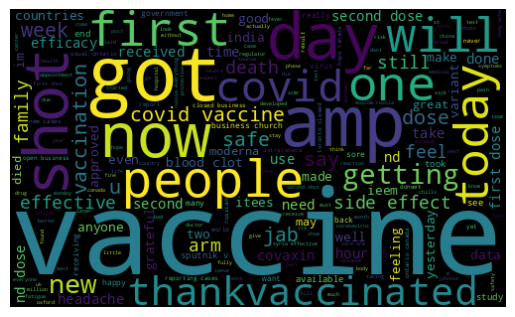

In [ ]:
allWords = ''.join([twts for twts in new_df['cleaned_tweet']])
wordCloud = WordCloud(width = 500,height =300,random_state = 21,max_font_size =
119).generate(allWords)
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

# Vectorization and Model

### shortcut to Load Clean Dataset

In [ ]:
c_df = pd.read_csv("cleaned_data.csv", encoding= 'unicode_escape')
c_df

,Unnamed: 0,tweet_text,label,cleaned_tweet,tokens,stopwords_tokens,stemmed_tokens,lemmatized_tokens
0,0,@CBCAlerts EMBARRASSING Crimea Russia everythi...,1,embarrassing crimea russia everything is open...,"['embarrassing', 'crimea', 'russia', 'everythi...","['embarrassing', 'crimea', 'russia', 'everythi...","['embarrass', 'crimea', 'russia', 'everyth', '...","['embarrassing', 'crimea', 'russia', 'everythi..."
1,1,@ColinDMello EMBARRASSING Moscow Russia everyt...,1,embarrassing moscow russia everything is open...,"['embarrassing', 'moscow', 'russia', 'everythi...","['embarrassing', 'moscow', 'russia', 'everythi...","['embarrass', 'moscow', 'russia', 'everyth', '...","['embarrassing', 'moscow', 'russia', 'everythi..."
2,2,Moderna (two-dose) vaccine available at CVS Ph...,1,moderna twodose vaccine available at cvs pharm...,"['moderna', 'twodose', 'vaccine', 'available',...","['moderna', 'twodose', 'vaccine', 'available',...","['moderna', 'twodos', 'vaccin', 'avail', 'cv',...","['moderna', 'twodose', 'vaccine', 'available',..."
3,3,"Message is loud and clear, go for Vaccination....",1,message is loud and clear go for vaccination i...,"['message', 'is', 'loud', 'and', 'clear', 'go'...","['message', 'loud', 'clear', 'go', 'vaccinatio...","['messag', 'loud', 'clear', 'go', 'vaccin', 's...","['message', 'loud', 'clear', 'go', 'vaccinatio..."
4,4,Second shot of #Moderna ?\nSore arm ?\n\nIÂEE...,1,second shot of \nsore arm \n\nieem smiling re...,"['second', 'shot', 'of', 'sore', 'arm', 'ieem'...","['second', 'shot', 'sore', 'arm', 'ieem', 'smi...","['second', 'shot', 'sore', 'arm', 'ieem', 'smi...","['second', 'shot', 'sore', 'arm', 'ieem', 'smi..."
...,...,...,...,...,...,...,...,...
835,835,Covaxin demonstrates 78 percent efficacy in Ph...,1,covaxin demonstrates percent efficacy in phas...,"['covaxin', 'demonstrates', 'percent', 'effica...","['covaxin', 'demonstrates', 'percent', 'effica...","['covaxin', 'demonstr', 'percent', 'efficaci',...","['covaxin', 'demonstrates', 'percent', 'effica..."
836,836,"@SayangRe @MatthewGreenNDP Oh no, he didnÂEEt...",0,oh no he didneet administer it i went to see...,"['oh', 'no', 'he', 'didneet', 'administer', 'i...","['oh', 'didneet', 'administer', 'went', 'see',...","['oh', 'didneet', 'administ', 'went', 'see', '...","['oh', 'didneet', 'administer', 'went', 'see',..."
837,837,#SorryForTigerWoods? \n#WoodsScrewsRodsAndPins...,0,\n \n\n\n\nmy husband amp i received our firs...,"['my', 'husband', 'amp', 'i', 'received', 'our...","['husband', 'amp', 'received', 'first', 'amp',...","['husband', 'amp', 'receiv', 'first', 'amp', '...","['husband', 'amp', 'received', 'first', 'amp',..."
838,838,@CDC So I Got my First #Moderna #Covid_19 Vacc...,0,so i got my first vaccine yesterday about ...,"['so', 'i', 'got', 'my', 'first', 'vaccine', '...","['got', 'first', 'vaccine', 'yesterday', 'mins...","['got', 'first', 'vaccin', 'yesterday', 'min',...","['got', 'first', 'vaccine', 'yesterday', 'min'..."


### export cleaned_data_tweet_only.csv

In [ ]:
c_df = pd.read_csv("cleaned_data.csv", encoding= 'unicode_escape')
s_df = c_df[["label","cleaned_tweet"]]
s_df

,label,cleaned_tweet
0,1,embarrassing crimea russia everything is open...
1,1,embarrassing moscow russia everything is open...
2,1,moderna twodose vaccine available at cvs pharm...
3,1,message is loud and clear go for vaccination i...
4,1,second shot of \nsore arm \n\nieem smiling re...
...,...,...
835,1,covaxin demonstrates percent efficacy in phas...
836,0,oh no he didneet administer it i went to see...
837,0,\n \n\n\n\nmy husband amp i received our firs...
838,0,so i got my first vaccine yesterday about ...


In [ ]:
s_df.to_csv("cleaned_data_tweet_only.csv")

## Option 1 (use lemmatization)

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC

I use lemmatized_tokens for development in machine learning.

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized tokens into TF-IDF vectors
X = tfidf_vectorizer.fit_transform(new_df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens)))

# Convert the label to numerical values (assuming 'label' column contains the target classes)
y = new_df['label']

# Print the shape of X and y to verify dimensions
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (840, 3052)
Shape of y: (840,)


### export tfidf_vectorizer.sav

In [ ]:
import pickle
from sklearn import model_selection
# save the model to disk
filename = 'tfidf_vectorizer.sav'
pickle.dump(tfidf_vectorizer, open(filename, 'wb'))

### Logistic Regression

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       119
           1       0.82      0.60      0.70       133

    accuracy                           0.72       252
   macro avg       0.74      0.73      0.72       252
weighted avg       0.75      0.72      0.72       252

Accuracy: 0.7222222222222222


In [ ]:

# save the model to disk
filename = 'logregr.sav'
pickle.dump(logreg, open(filename, 'wb'))


dari hasil klasifiksi report dihasilkan akurasi 77% berdasarkan  dari total data 840 dari msing" lebel negatif 420 dan positif 420 degan splitting sekitar 20% menunjukan bahwa model algoritma logistic regression  cukup baik meskipun dari data latih yang tidak terlalu banyak.

## Option 2 (use stemming)

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized tokens into TF-IDF vectors
X = tfidf_vectorizer.fit_transform(new_df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)))

# Convert the label to numerical values (assuming 'label' column contains the target classes)
y = new_df['label']

# Print the shape of X and y to verify dimensions
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (840, 2606)
Shape of y: (840,)


### Logistic Regression

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       119
           1       0.83      0.60      0.70       133

    accuracy                           0.73       252
   macro avg       0.75      0.73      0.72       252
weighted avg       0.75      0.73      0.72       252

Accuracy: 0.7261904761904762
